## Analyzing Research Articles using Topic Modelling Approach


In [5]:
#Importing neccessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [6]:
# Load and read datasets

papers = pd.read_csv('C:/Users/Saleeh/Documents/Salford University/Lectures/AI - Natural Language Processing/Assessment/Dataset/Scopus Extract/Scopus dataset.csv')

In [7]:
# View first 5 rows of data 

papers.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Link,Abstract,Author Keywords
0,Yan L.; Chen Y.; Zheng L.; Zhang Y.,"Yan, Lina (57223593838); Chen, Yile (572219549...",57223593838; 57221954984; 57221968671; 5757867...,Application of computer vision technology in s...,2024,Heritage Science,https://www.scopus.com/inward/record.uri?eid=2...,"In computer artificial intelligence, there is ...",NaN
1,Delcker J.; Heil J.; Ifenthaler D.; Seufert S....,"Delcker, Jan (57192920924); Heil, Joana (58131...",57192920924; 58131602100; 57192168368; 6603394...,First-year students AI-competence as a predict...,2024,International Journal of Educational Technolog...,https://www.scopus.com/inward/record.uri?eid=2...,The influence of Artificial Intelligence on hi...,AI tool; Artificial Intelligence; Chatbot; Hig...
2,Lu H.; Mao Y.; Li J.; Zhu L.,"Lu, Hang (55786333200); Mao, Yuxing (173460731...",55786333200; 17346073100; 57868233800; 5895022...,Multimodal deep learning-based diagnostic mode...,2024,BMC Medical Informatics and Decision Making,https://www.scopus.com/inward/record.uri?eid=2...,Background: Benign paroxysmal positional verti...,BPPV; Deep learning; Feature fusion; Multimoda...
3,Nie W.; Chen Y.; Wang Y.; Wang P.; Li M.; Ning L.,"Nie, Wuzhou (58875023800); Chen, Yong (5723646...",58875023800; 57236468700; 58875378200; 5887628...,Routing networking technology based on improve...,2024,Eurasip Journal on Advances in Signal Processing,https://www.scopus.com/inward/record.uri?eid=2...,Space-air-ground integrated networks comprise ...,Ant colony algorithm; Routing networking proto...
4,Sarumi O.A.; Hahn M.; Heider D.,"Sarumi, Oluwafemi A. (57193360610); Hahn, Maxi...",57193360610; 58817998000; 16743488600,NeuralBeds: Neural embeddings for efficient DN...,2024,Computational and Structural Biotechnology Jou...,https://www.scopus.com/inward/record.uri?eid=2...,The availability of high throughput sequencing...,Artificial intelligence; DNA similarity; Neura...


In [8]:
papers.describe(include = 'all')

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Link,Abstract,Author Keywords
count,4998,4998,4998,5000,5000.0,5000,5000,5000,4789
unique,4965,4982,4981,5000,NaN,1195,5000,4990,4789
top,Zhang X.,"Bogue, Robert (22936667400)",22936667400,Application of computer vision technology in s...,NaN,IEEE Access,https://www.scopus.com/inward/record.uri?eid=2...,[No abstract available],AI tool; Artificial Intelligence; Chatbot; Hig...
freq,4,3,3,1,NaN,228,1,11,1
mean,NaN,NaN,NaN,NaN,2024.0,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,2024.0,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2024.0,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2024.0,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2024.0,NaN,NaN,NaN,NaN


Datasets has different number of unique values for title and abstract and total number of records indicating that some documents may have similar titles or abstracts across different subject classes.

In [9]:
# summary of the columns in the dataset
# Totals rows of that is 303

papers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Authors            4998 non-null   object
 1   Author full names  4998 non-null   object
 2   Author(s) ID       4998 non-null   object
 3   Title              5000 non-null   object
 4   Year               5000 non-null   int64 
 5   Source title       5000 non-null   object
 6   Link               5000 non-null   object
 7   Abstract           5000 non-null   object
 8   Author Keywords    4789 non-null   object
dtypes: int64(1), object(8)
memory usage: 351.7+ KB


In [10]:
# Remove columns that does not relate to the task
# Add paper_text column

papers = papers.drop(columns=['Authors','Source title','Link'], axis=1)

#print out the first five rows of papers
papers.head()

,Author full names,Author(s) ID,Title,Year,Abstract,Author Keywords
0,"Yan, Lina (57223593838); Chen, Yile (572219549...",57223593838; 57221954984; 57221968671; 5757867...,Application of computer vision technology in s...,2024,"In computer artificial intelligence, there is ...",NaN
1,"Delcker, Jan (57192920924); Heil, Joana (58131...",57192920924; 58131602100; 57192168368; 6603394...,First-year students AI-competence as a predict...,2024,The influence of Artificial Intelligence on hi...,AI tool; Artificial Intelligence; Chatbot; Hig...
2,"Lu, Hang (55786333200); Mao, Yuxing (173460731...",55786333200; 17346073100; 57868233800; 5895022...,Multimodal deep learning-based diagnostic mode...,2024,Background: Benign paroxysmal positional verti...,BPPV; Deep learning; Feature fusion; Multimoda...
3,"Nie, Wuzhou (58875023800); Chen, Yong (5723646...",58875023800; 57236468700; 58875378200; 5887628...,Routing networking technology based on improve...,2024,Space-air-ground integrated networks comprise ...,Ant colony algorithm; Routing networking proto...
4,"Sarumi, Oluwafemi A. (57193360610); Hahn, Maxi...",57193360610; 58817998000; 16743488600,NeuralBeds: Neural embeddings for efficient DN...,2024,The availability of high throughput sequencing...,Artificial intelligence; DNA similarity; Neura...


In [11]:
# Add paper_text column
papers['paper_text'] = papers['Title'] + " " + papers['Abstract']

#print out the first five rows of papers
papers.head()

,Author full names,Author(s) ID,Title,Year,Abstract,Author Keywords,paper_text
0,"Yan, Lina (57223593838); Chen, Yile (572219549...",57223593838; 57221954984; 57221968671; 5757867...,Application of computer vision technology in s...,2024,"In computer artificial intelligence, there is ...",NaN,Application of computer vision technology in s...
1,"Delcker, Jan (57192920924); Heil, Joana (58131...",57192920924; 58131602100; 57192168368; 6603394...,First-year students AI-competence as a predict...,2024,The influence of Artificial Intelligence on hi...,AI tool; Artificial Intelligence; Chatbot; Hig...,First-year students AI-competence as a predict...
2,"Lu, Hang (55786333200); Mao, Yuxing (173460731...",55786333200; 17346073100; 57868233800; 5895022...,Multimodal deep learning-based diagnostic mode...,2024,Background: Benign paroxysmal positional verti...,BPPV; Deep learning; Feature fusion; Multimoda...,Multimodal deep learning-based diagnostic mode...
3,"Nie, Wuzhou (58875023800); Chen, Yong (5723646...",58875023800; 57236468700; 58875378200; 5887628...,Routing networking technology based on improve...,2024,Space-air-ground integrated networks comprise ...,Ant colony algorithm; Routing networking proto...,Routing networking technology based on improve...
4,"Sarumi, Oluwafemi A. (57193360610); Hahn, Maxi...",57193360610; 58817998000; 16743488600,NeuralBeds: Neural embeddings for efficient DN...,2024,The availability of high throughput sequencing...,Artificial intelligence; DNA similarity; Neura...,NeuralBeds: Neural embeddings for efficient DN...


In [12]:
# Remove missing values

papers = papers.dropna(axis='rows')

papers.head()

,Author full names,Author(s) ID,Title,Year,Abstract,Author Keywords,paper_text
1,"Delcker, Jan (57192920924); Heil, Joana (58131...",57192920924; 58131602100; 57192168368; 6603394...,First-year students AI-competence as a predict...,2024,The influence of Artificial Intelligence on hi...,AI tool; Artificial Intelligence; Chatbot; Hig...,First-year students AI-competence as a predict...
2,"Lu, Hang (55786333200); Mao, Yuxing (173460731...",55786333200; 17346073100; 57868233800; 5895022...,Multimodal deep learning-based diagnostic mode...,2024,Background: Benign paroxysmal positional verti...,BPPV; Deep learning; Feature fusion; Multimoda...,Multimodal deep learning-based diagnostic mode...
3,"Nie, Wuzhou (58875023800); Chen, Yong (5723646...",58875023800; 57236468700; 58875378200; 5887628...,Routing networking technology based on improve...,2024,Space-air-ground integrated networks comprise ...,Ant colony algorithm; Routing networking proto...,Routing networking technology based on improve...
4,"Sarumi, Oluwafemi A. (57193360610); Hahn, Maxi...",57193360610; 58817998000; 16743488600,NeuralBeds: Neural embeddings for efficient DN...,2024,The availability of high throughput sequencing...,Artificial intelligence; DNA similarity; Neura...,NeuralBeds: Neural embeddings for efficient DN...
6,"Parvin, Sazia (24344520800); Nimmy, Sonia Farh...",24344520800; 55220096200; 55220578700,Convolutional neural network based data interp...,2024,Alzheimer’s disease (AD) is a neurological dis...,Alzheimer’s disease; Graphical genes tree; Lay...,Convolutional neural network based data interp...


# Text Preprocessing

The Text preprocessing step will be carried out in the following step

1. Data Cleaning
2. Tokenization
3. Stopword Removal
4. Normalization
5. Text Encoding
6. Vectorization
7. Data Splitting

In [13]:
#Import neccessary libraries for text preprocessing

import re
from string import punctuation
import contractions

In [14]:
#Create a function for preprocessing

def clean_text(text):
    # make text lowercase    
    text = str(text).lower()
    # expand contractions
    text = " ".join([contractions.fix(expanded_word) for expanded_word in text.split()])
    # remove text in square brackets
    text = re.sub('\[.*?\]', '', text)
    # remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    # remove punctuation
    text = re.sub('[%s]' % re.escape(punctuation), '', text)
    # remove new lines
    text = re.sub('\n', '', text)
    # remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)
    # remove apostrophes
    text = re.sub("''", '', text)
    return text

In [15]:
# apply function on each text in the dataset

papers['paper_text_preprocessed'] = papers['paper_text'].apply(lambda x: clean_text(x))

papers.head()

,Author full names,Author(s) ID,Title,Year,Abstract,Author Keywords,paper_text,paper_text_preprocessed
1,"Delcker, Jan (57192920924); Heil, Joana (58131...",57192920924; 58131602100; 57192168368; 6603394...,First-year students AI-competence as a predict...,2024,The influence of Artificial Intelligence on hi...,AI tool; Artificial Intelligence; Chatbot; Hig...,First-year students AI-competence as a predict...,firstyear students aicompetence as a predictor...
2,"Lu, Hang (55786333200); Mao, Yuxing (173460731...",55786333200; 17346073100; 57868233800; 5895022...,Multimodal deep learning-based diagnostic mode...,2024,Background: Benign paroxysmal positional verti...,BPPV; Deep learning; Feature fusion; Multimoda...,Multimodal deep learning-based diagnostic mode...,multimodal deep learningbased diagnostic model...
3,"Nie, Wuzhou (58875023800); Chen, Yong (5723646...",58875023800; 57236468700; 58875378200; 5887628...,Routing networking technology based on improve...,2024,Space-air-ground integrated networks comprise ...,Ant colony algorithm; Routing networking proto...,Routing networking technology based on improve...,routing networking technology based on improve...
4,"Sarumi, Oluwafemi A. (57193360610); Hahn, Maxi...",57193360610; 58817998000; 16743488600,NeuralBeds: Neural embeddings for efficient DN...,2024,The availability of high throughput sequencing...,Artificial intelligence; DNA similarity; Neura...,NeuralBeds: Neural embeddings for efficient DN...,neuralbeds neural embeddings for efficient dna...
6,"Parvin, Sazia (24344520800); Nimmy, Sonia Farh...",24344520800; 55220096200; 55220578700,Convolutional neural network based data interp...,2024,Alzheimer’s disease (AD) is a neurological dis...,Alzheimer’s disease; Graphical genes tree; Lay...,Convolutional neural network based data interp...,convolutional neural network based data interp...


### Tokenization

In [16]:
### Add comment

from nltk.tokenize import word_tokenize
papers['paper_words'] = papers['paper_text_preprocessed'].apply(lambda x:word_tokenize(str(x)))
papers.head()

,Author full names,Author(s) ID,Title,Year,Abstract,Author Keywords,paper_text,paper_text_preprocessed,paper_words
1,"Delcker, Jan (57192920924); Heil, Joana (58131...",57192920924; 58131602100; 57192168368; 6603394...,First-year students AI-competence as a predict...,2024,The influence of Artificial Intelligence on hi...,AI tool; Artificial Intelligence; Chatbot; Hig...,First-year students AI-competence as a predict...,firstyear students aicompetence as a predictor...,"[firstyear, students, aicompetence, as, a, pre..."
2,"Lu, Hang (55786333200); Mao, Yuxing (173460731...",55786333200; 17346073100; 57868233800; 5895022...,Multimodal deep learning-based diagnostic mode...,2024,Background: Benign paroxysmal positional verti...,BPPV; Deep learning; Feature fusion; Multimoda...,Multimodal deep learning-based diagnostic mode...,multimodal deep learningbased diagnostic model...,"[multimodal, deep, learningbased, diagnostic, ..."
3,"Nie, Wuzhou (58875023800); Chen, Yong (5723646...",58875023800; 57236468700; 58875378200; 5887628...,Routing networking technology based on improve...,2024,Space-air-ground integrated networks comprise ...,Ant colony algorithm; Routing networking proto...,Routing networking technology based on improve...,routing networking technology based on improve...,"[routing, networking, technology, based, on, i..."
4,"Sarumi, Oluwafemi A. (57193360610); Hahn, Maxi...",57193360610; 58817998000; 16743488600,NeuralBeds: Neural embeddings for efficient DN...,2024,The availability of high throughput sequencing...,Artificial intelligence; DNA similarity; Neura...,NeuralBeds: Neural embeddings for efficient DN...,neuralbeds neural embeddings for efficient dna...,"[neuralbeds, neural, embeddings, for, efficien..."
6,"Parvin, Sazia (24344520800); Nimmy, Sonia Farh...",24344520800; 55220096200; 55220578700,Convolutional neural network based data interp...,2024,Alzheimer’s disease (AD) is a neurological dis...,Alzheimer’s disease; Graphical genes tree; Lay...,Convolutional neural network based data interp...,convolutional neural network based data interp...,"[convolutional, neural, network, based, data, ..."


### Stop words removal

In [17]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     EE certificate key too weak (_ssl.c:1006)>


False

In [18]:
# define stopword removal function
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', "'",'used','using','one','two','also','use','us','may'])

def remove_stopword(word_list):
    return [word for word in word_list if word not in stop_words]

papers['paper_words_excl_sw'] = papers['paper_words'].apply(lambda x: remove_stopword(x))

In [19]:
papers.head()

,Author full names,Author(s) ID,Title,Year,Abstract,Author Keywords,paper_text,paper_text_preprocessed,paper_words,paper_words_excl_sw
1,"Delcker, Jan (57192920924); Heil, Joana (58131...",57192920924; 58131602100; 57192168368; 6603394...,First-year students AI-competence as a predict...,2024,The influence of Artificial Intelligence on hi...,AI tool; Artificial Intelligence; Chatbot; Hig...,First-year students AI-competence as a predict...,firstyear students aicompetence as a predictor...,"[firstyear, students, aicompetence, as, a, pre...","[firstyear, students, aicompetence, predictor,..."
2,"Lu, Hang (55786333200); Mao, Yuxing (173460731...",55786333200; 17346073100; 57868233800; 5895022...,Multimodal deep learning-based diagnostic mode...,2024,Background: Benign paroxysmal positional verti...,BPPV; Deep learning; Feature fusion; Multimoda...,Multimodal deep learning-based diagnostic mode...,multimodal deep learningbased diagnostic model...,"[multimodal, deep, learningbased, diagnostic, ...","[multimodal, deep, learningbased, diagnostic, ..."
3,"Nie, Wuzhou (58875023800); Chen, Yong (5723646...",58875023800; 57236468700; 58875378200; 5887628...,Routing networking technology based on improve...,2024,Space-air-ground integrated networks comprise ...,Ant colony algorithm; Routing networking proto...,Routing networking technology based on improve...,routing networking technology based on improve...,"[routing, networking, technology, based, on, i...","[routing, networking, technology, based, impro..."
4,"Sarumi, Oluwafemi A. (57193360610); Hahn, Maxi...",57193360610; 58817998000; 16743488600,NeuralBeds: Neural embeddings for efficient DN...,2024,The availability of high throughput sequencing...,Artificial intelligence; DNA similarity; Neura...,NeuralBeds: Neural embeddings for efficient DN...,neuralbeds neural embeddings for efficient dna...,"[neuralbeds, neural, embeddings, for, efficien...","[neuralbeds, neural, embeddings, efficient, dn..."
6,"Parvin, Sazia (24344520800); Nimmy, Sonia Farh...",24344520800; 55220096200; 55220578700,Convolutional neural network based data interp...,2024,Alzheimer’s disease (AD) is a neurological dis...,Alzheimer’s disease; Graphical genes tree; Lay...,Convolutional neural network based data interp...,convolutional neural network based data interp...,"[convolutional, neural, network, based, data, ...","[convolutional, neural, network, based, data, ..."


### Lemmatization

After removing stopwords, I applied lemmatization technique to further preprocces the text data bu converting each word to its base form

In [20]:
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
papers['paper_words_excl_sw'] = papers['paper_words_excl_sw'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
papers.tail()

[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     EE certificate key too weak (_ssl.c:1006)>


,Author full names,Author(s) ID,Title,Year,Abstract,Author Keywords,paper_text,paper_text_preprocessed,paper_words,paper_words_excl_sw
4995,"Giunchiglia, Eleonora (57212477401); Tatomir, ...",57212477401; 58863268300; 57472495300; 7004581222,CCN+: A neuro-symbolic framework for deep lear...,2024,For their outstanding ability of finding hidde...,Artificial intelligence; Deep learning; Machin...,CCN+: A neuro-symbolic framework for deep lear...,ccn a neurosymbolic framework for deep learnin...,"[ccn, a, neurosymbolic, framework, for, deep, ...","[ccn, neurosymbolic, framework, deep, learning..."
4996,"Wu, Xiaopei (58866534800); Li, Li (57225064944)",58866534800; 57225064944,An application of generative AI for knitted te...,2024,"In recent years, artificial intelligence (AI) ...",computational creativity; creative design proc...,An application of generative AI for knitted te...,an application of generative ai for knitted te...,"[an, application, of, generative, ai, for, kni...","[application, generative, ai, knitted, textile..."
4997,"Lahiri, Saikat (58865204400); Bose, Indranil (...",58865204400; 52663129200; 56645709400,Rebel Foods’ Cloud Kitchen Technologies: Food ...,2024,This case study examines the India based cloud...,Artificial Intelligence; Blockchain; Cloud Kit...,Rebel Foods’ Cloud Kitchen Technologies: Food ...,rebel foods’ cloud kitchen technologies food f...,"[rebel, foods, ’, cloud, kitchen, technologies...","[rebel, food, ’, cloud, kitchen, technology, f..."
4998,"Alzahrani, Ahmad A. (57211428486)",57211428486,Bioinspired Image Processing Enabled Facial Em...,2024,Owing to the unpredictable nature of human fac...,artificial intelligence; deep learning; equili...,Bioinspired Image Processing Enabled Facial Em...,bioinspired image processing enabled facial em...,"[bioinspired, image, processing, enabled, faci...","[bioinspired, image, processing, enabled, faci..."
4999,"Jackson, Ilya (57204778322); Ivanov, Dmitry (5...",57204778322; 56350235000; 57201190890; 5673455...,Generative artificial intelligence in supply c...,2024,This research examines the transformative pote...,artificial intelligence; GAI; Generative artif...,Generative artificial intelligence in supply c...,generative artificial intelligence in supply c...,"[generative, artificial, intelligence, in, sup...","[generative, artificial, intelligence, supply,..."


## Visualize the data using wordcloud package

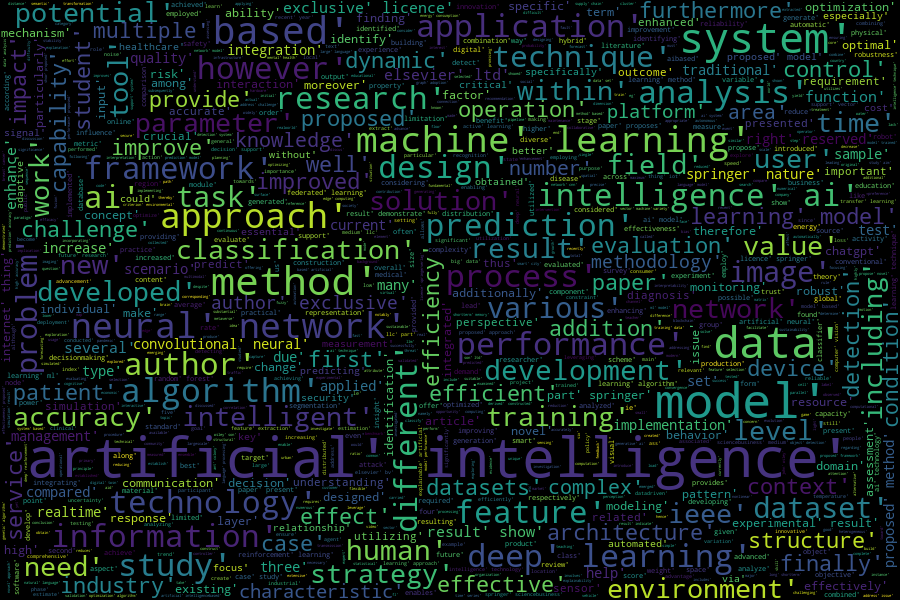

In [21]:
# Visualize the data using wordcloud package
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together
long_string = ','.join((str(l) for l in papers['paper_words_excl_sw']))
                       
# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=3000, contour_width=3, contour_color='steelblue', width = 900, height = 600)

#Generate a word cloud
wordcloud.generate(long_string)

#Visualize the word cloud
wordcloud.to_image()

## LDA Analysis

In [22]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

        
data = papers['paper_words_excl_sw'].tolist()
data_words = list(sent_to_words(data))


print(data_words[:2][0][:10])

['firstyear', 'student', 'aicompetence', 'predictor', 'intended', 'de', 'facto', 'aitools', 'supporting', 'learning']


In [23]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:10])

[(0, 1), (1, 3), (2, 1), (3, 1), (4, 1), (5, 6), (6, 1), (7, 1), (8, 2), (9, 1)]


## LDA model training

In [26]:
from pprint import pprint

# number of topics
num_topics = 20

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.011*"data" + 0.007*"artificial" + 0.007*"ai" + 0.007*"technology" + '
  '0.006*"algorithm" + 0.006*"based" + 0.006*"system" + 0.005*"paper" + '
  '0.005*"analysis" + 0.004*"machine"'),
 (1,
  '0.016*"model" + 0.012*"learning" + 0.010*"system" + 0.009*"ai" + '
  '0.007*"network" + 0.007*"result" + 0.006*"intelligence" + '
  '0.006*"artificial" + 0.006*"method" + 0.005*"algorithm"'),
 (2,
  '0.013*"algorithm" + 0.008*"model" + 0.008*"method" + 0.007*"proposed" + '
  '0.006*"result" + 0.006*"system" + 0.006*"data" + 0.006*"problem" + '
  '0.005*"network" + 0.005*"artificial"'),
 (3,
  '0.014*"model" + 0.010*"data" + 0.007*"ai" + 0.007*"study" + 0.007*"system" '
  '+ 0.006*"learning" + 0.006*"artificial" + 0.005*"analysis" + '
  '0.005*"process" + 0.005*"intelligence"'),
 (4,
  '0.012*"model" + 0.012*"learning" + 0.009*"method" + 0.008*"study" + '
  '0.008*"data" + 0.008*"ai" + 0.007*"algorithm" + 0.006*"intelligence" + '
  '0.006*"image" + 0.006*"analysis"'),
 (5,
  '0.012*"lear

## Analyzing LDA model

Now, let's visualize the topics to identify patterns for interpretability using pyLDAvis

In [27]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('content_'+str(num_topics) + '.pickle')

if not os.path.exists(LDAvis_data_filepath):
    # Prepare the LDA visualization data
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    # Save the prepared data to disk
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
else:
    # Load the pre-prepared pyLDAvis data from disk
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)

# Save the HTML visualization
pyLDAvis.save_html(LDAvis_prepared, 'content_'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
17    -0.021093 -0.005550       1        1  8.867528
14     0.015724  0.001646       2        1  8.430862
11    -0.012613 -0.000634       3        1  8.066383
12     0.001789  0.007250       4        1  7.909459
1      0.000548 -0.001350       5        1  6.214835
16    -0.005400  0.004232       6        1  6.189253
7      0.003902 -0.009411       7        1  5.583549
3      0.006305  0.012788       8        1  5.219896
10    -0.011707  0.008357       9        1  4.743234
9      0.000913  0.005872      10        1  4.677778
4     -0.012086  0.003556      11        1  4.528577
2     -0.003107 -0.044622      12        1  4.389457
19    -0.019369 -0.011011      13        1  3.853819
13    -0.018964 -0.001873      14        1  3.793536
18     0.005155  0.002539      15        1  3.588257
15     0.000582 -0.001342      16        1  3.280764
5      0.012556  0.007527      17        1  3.257985
6     -0.011051  0.005115      18        1  3.002187
8      0.012583  0.033270      19        1  2.594154
0      0.055332 -0.016358      20        1  1.808488, topic_info=          Term         Freq        Total Category  logprob  loglift
409      image  2151.000000  2151.000000  Default  30.0000  30.0000
41    learning  5384.000000  5384.000000  Default  29.0000  29.0000
1           ai  4468.000000  4468.000000  Default  28.0000  28.0000
161  algorithm  3325.000000  3325.000000  Default  27.0000  27.0000
120      model  8702.000000  8702.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
138   proposed    40.695221  3236.477774  Topic20  -5.7253  -0.3635
120      model    54.928030  8702.773692  Topic20  -5.4254  -1.0527
41    learning    47.477767  5384.804818  Topic20  -5.5711  -0.7184
72    accuracy    36.179592  2373.581988  Topic20  -5.8429  -0.1710
166   approach    35.113098  2834.256704  Topic20  -5.8728  -0.3783

[1630 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
15221      4  0.195845   aacogan
15221     12  0.783379   aacogan
17685      9  0.796435    aashto
25209      1  0.294616  abortion
25209      4  0.098205  abortion
...      ...       ...       ...
15852      1  0.754867      μvrs
15852      3  0.094358      μvrs
13596     10  0.169878        σϕ
13596     15  0.169878        σϕ
13596     18  0.339756        σϕ

[6298 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 15, 12, 13, 2, 17, 8, 4, 11, 10, 5, 3, 20, 14, 19, 16, 6, 7, 9, 1])